# Dogs Vs Cats Identification ALgorithm CNN (AlexNet & VGG16)

In this competition, you'll write an algorithm to classify whether images contain either a dog or a cat.  This is easy for humans, dogs, and cats. Your computer will find it a bit more difficult. The training archive contains 25,000 images of dogs and cats. Train your algorithm on these files and predict the labels for test1.zip (1 = dog, 0 = cat).

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:48<00:00, 22.7MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.3MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import *

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(directory='/content/train',
                                                    labels='inferred', label_mode='int',
                                                    batch_size=32,
                                                    image_size=(256,256))

validation_ds = keras.utils.image_dataset_from_directory(directory='/content/test',
                                                    labels='inferred', label_mode='int',
                                                    batch_size=32,
                                                    image_size=(256,256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Data Normalization
def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

In [ ]:
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# Create CNN Model
### ALEXNET - 2012 Model

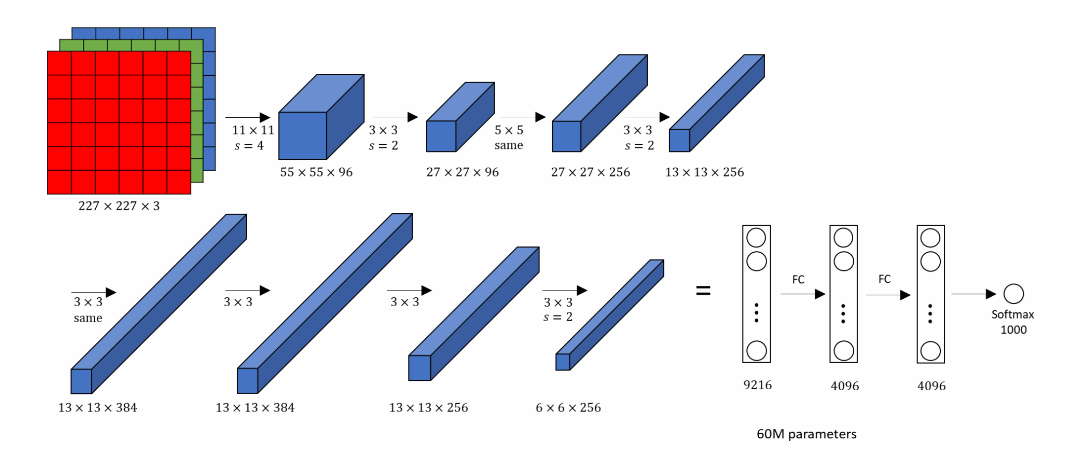

In [ ]:
dnn = Sequential()
dnn.add(Conv2D(96, kernel_size=(11,11),padding='valid', strides=4, activation='relu', input_shape=(256,256,3)))
dnn.add(BatchNormalization())
dnn.add(MaxPooling2D(pool_size=(3,3), strides = 2, padding = 'valid'))

dnn.add(Conv2D(256, kernel_size = (5,5), padding ='same', activation ='relu'))
dnn.add(BatchNormalization())
dnn.add(MaxPooling2D(pool_size=(3,3), strides = 2, padding = 'valid'))

dnn.add(Conv2D(384, kernel_size = (3,3), padding ='same', activation ='relu'))
dnn.add(BatchNormalization())

dnn.add(Conv2D(384, kernel_size=(3,3), padding='valid',  activation='relu'))
dnn.add(BatchNormalization())

dnn.add(Conv2D(256, kernel_size=(3,3), padding='valid',  activation='relu'))
dnn.add(BatchNormalization())

dnn.add(MaxPooling2D(pool_size=(3,3), strides = 2, padding = 'valid'))

dnn.add(Flatten())

dnn.add(Dense(9216, activation='relu'))
dnn.add(Dropout(0.2))

dnn.add(Dense(4096, activation='relu'))
dnn.add(Dropout(0.25))

dnn.add(Dense(4096, activation='relu'))
dnn.add(Dropout(0.30))

dnn.add(Dense(1, activation='sigmoid'))

dnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 96)        34944     
                                                                 
 batch_normalization_2 (Batc  (None, 62, 62, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 96)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 256)       614656    
                                                                 
 batch_normalization_3 (Batc  (None, 30, 30, 256)      1024      
 hNormalization)                                                 
                                                      

In [ ]:
dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = dnn.fit(train_ds, validation_data=validation_ds, batch_size=32, epochs=5)

Epoch 1/5
625/625 [==============================] - 56s 90ms/step - loss: 0.2043 - accuracy: 0.9199 - val_loss: 0.2914 - val_accuracy: 0.8804
Epoch 2/5
625/625 [==============================] - 58s 92ms/step - loss: 0.1908 - accuracy: 0.9261 - val_loss: 0.3895 - val_accuracy: 0.8694
Epoch 3/5
625/625 [==============================] - 58s 93ms/step - loss: 0.1887 - accuracy: 0.9283 - val_loss: 0.4800 - val_accuracy: 0.8724
Epoch 4/5
625/625 [==============================] - 57s 90ms/step - loss: 0.1592 - accuracy: 0.9410 - val_loss: 0.3393 - val_accuracy: 0.8788
Epoch 5/5
625/625 [==============================] - 65s 102ms/step - loss: 0.1303 - accuracy: 0.9518 - val_loss: 0.4512 - val_accuracy: 0.8520


In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/download (1).jpg')

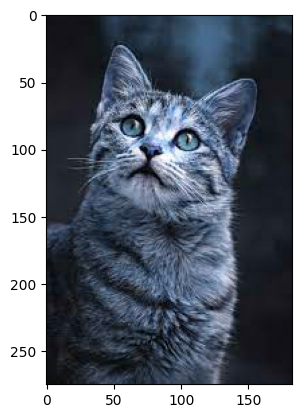

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(275, 183, 3)

In [ ]:
test_img = cv2.resize(test_img, (256,256))

In [ ]:
test_img.shape

(256, 256, 3)

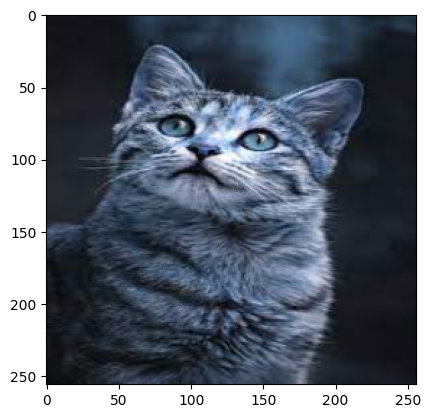

In [ ]:
plt.imshow(test_img)

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
dnn.predict(test_input)

1/1 [==============================] - 0s 25ms/step


array([[0.]], dtype=float32)

###VGG16 Model
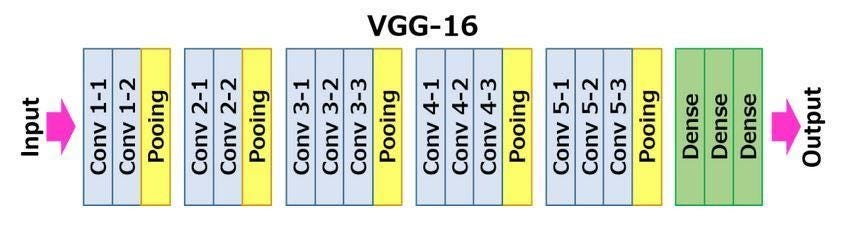

In [ ]:
# Using transfer learning instead of manual work


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(include_top = False, weights = "imagenet", input_shape = (256,256,3) )

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
dnn = Sequential()
dnn.add(conv_base)
dnn.add(Flatten())
dnn.add(Dense(256, activation='relu'))
dnn.add(Dense(1, activation='sigmoid'))
dnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               8388864   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23,103,809
Trainable params: 23,103,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history1 = dnn.fit(train_ds, validation_data=validation_ds, batch_size=128, epochs=10)